In [222]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

#1-- Curve fitting guided problem
#1a) Use Pandas to do the following:
    #1.Read in the file ”GlobalLandTemperaturesByState.csv”.
file = pd.read_csv('GlobalLandTemperaturesByState.csv')
file
    #2. Filter the table to include only the columns for the date, temperature, and state.
file.filter(items=['dt', 'AverageTemperature', 'State'])

    #3 Filter the table to include only years after 2000.
file['dt'] = pd.to_datetime(file['dt'], format='%Y-%m-%d')

new_data = file[file['dt'].dt.year > 2000]

    #4 Filter the table to include only the rows corresponding to Wyoming,Nebraska, or South Dakota. 
        #Check: your table should be 495 rows and 3 columns
three_states = ['Wyoming', 'Nebraska', 'South Dakota']

new_filtered_table = new_data[new_data['State'].isin(three_states)][['dt', 'AverageTemperature', 'State']]
new_filtered_table


,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [223]:
#(1b) Modify the table such that it contains the average temperature over all three states for each date. 
#It should have two columns: date and average temperature
avg_temperature = (new_filtered_table.groupby('dt', as_index=False).agg(avg_temperature=('AverageTemperature', 'mean')))
avg_temperature

,dt,avg_temperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


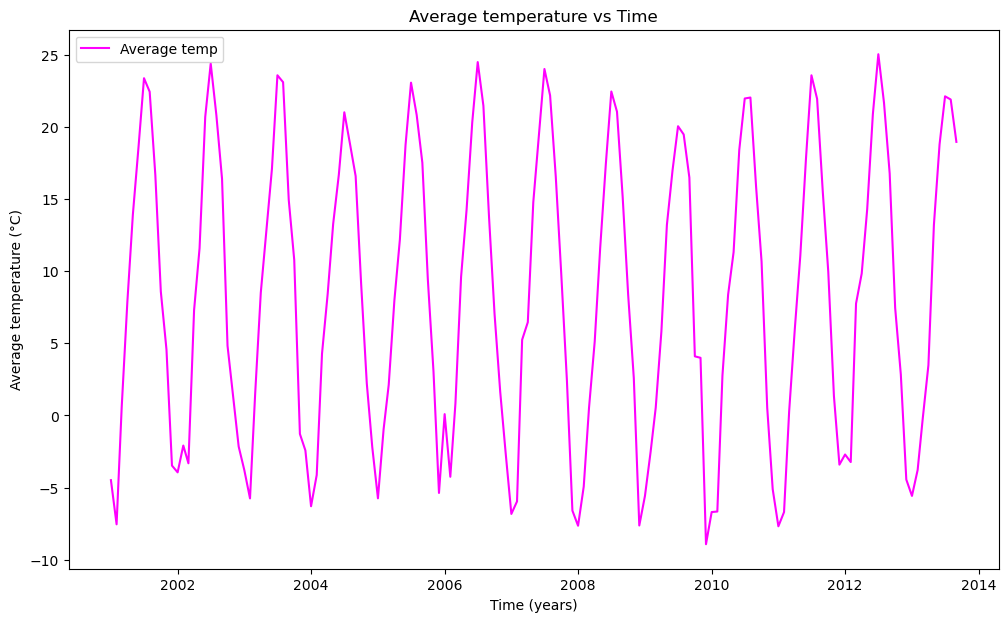

In [226]:
#(1c) Use matplotlib.pyplot to plot the data from the table you created above.
#You can pass pandas columns directly into matplotlib without needing to turn them into arrays
plt.figure(figsize=(12, 7))
plt.plot(avg_temperature['dt'], avg_temperature['avg_temperature'], label='Average temp', color='magenta')

plt.xlabel('Time (years)')
plt.ylabel('Average temperature (°C)')
plt.title('Average temperature vs Time')
plt.legend()
plt.show()



In [228]:
#(1d) scipy.optimize, unsurprisingly, can only do math with numbers. The date column of the table is currently composed of strings.
    #• 1. Fix this and convert the string date into numerical values however you see fit, and make it a column in the dataframe. 
    #Your numerical values should capture all parts of the date provided in the string (don’t use just the year, etc).
file['dt'] = pd.to_datetime(new_data['dt'])
file['numdate'] = new_data['dt'].apply(lambda x: x.timestamp())


In [230]:
#(1e)--scipy.optimize requires: a model equation, and an initial guess of parameters. For this section:
    #1--Define an appropriate model equation. Use a generic form like mx+b: there should be four parameters
def function(x, A, B, C, D):
    return A * np.cos(B * (x + C)) + D

    #2. Make an initial guess at the parameters and save them in an array.

guess = [10, 2 * np.pi, 0, 20]


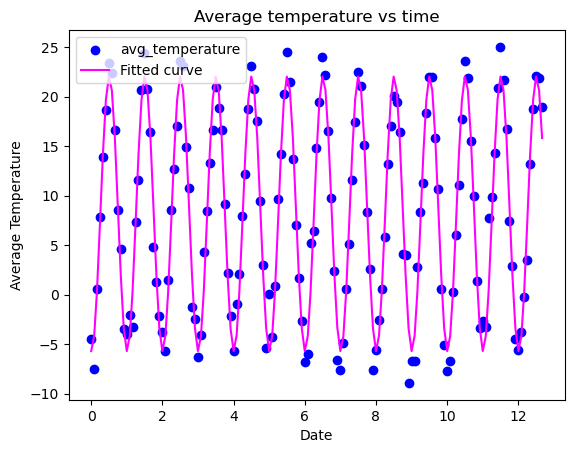

In [232]:
#(1f) Run scipy.optimize’s curve fit function! Remember that it outputs a tuplecontaining two arrays: the parameter array and the covariance matrix.
    #• If while attempting this, you get one of the following errors:
    #• Something about maximum depth
    #• Something about not being able to estimate the covariance
    #• A line that does not fit the data at all You may need to re-examine yourguesses for the initial parameters (particularly the period). 
    #This is why plotting the data before fitting it is critical.
x = (avg_temperature['dt'] - avg_temperature['dt'].min()).dt.days / 365 

y = avg_temperature['avg_temperature']

#guess = [np.std(y), 2 * np.pi / (6 * 365), np.pi / 2, np.median(y)]

parameter, covariance = curve_fit(function, x, y, p0=guess)

new_y = function(x, *parameter)

plt.scatter(x, y, label='avg_temperature', color='blue')
plt.plot(x, new_y, label='Fitted curve', color='magenta')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average temperature vs time")
plt.legend()
plt.show()

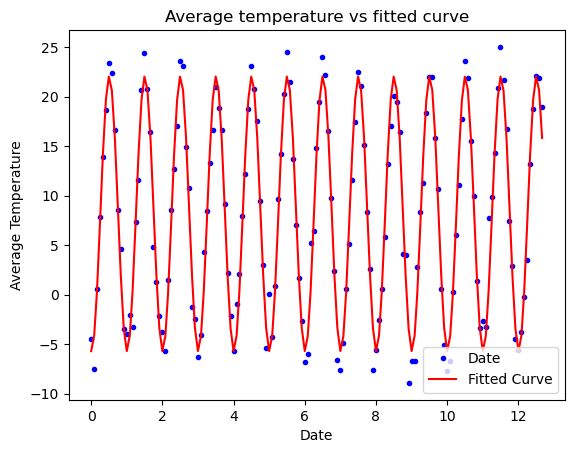

In [234]:
#(1g)
plt.plot(x, y, 'b.', label='Date')  
plt.plot(x, new_y, 'r-', label='Fitted Curve')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average temperature vs fitted curve')
plt.legend()
plt.show()

In [236]:
#(1h)
errors = np.sqrt(np.diagonal(covariance))
errors

array([0.22650023, 0.00448548, 0.00522188, 0.16069847])

In [238]:
#(1i)

A, B, C, D = parameter 


A_err = np.sqrt(covariance[0, 0])
B_err = np.sqrt(covariance[1, 1])
C_err = np.sqrt(covariance[2, 2])
D_err = np.sqrt(covariance[3, 3])

print(f"A = {A:.3f} +/- {A_err:.3f}")
print(f"B = {B:.3e} +/- {B_err:.3e}")
print(f"C = {C:.3f} +/- {C_err:.3f}")
print(f"D = {D:.3f} +/- {D_err:.3f}")


final_equation = f"y = {A:.2f} * cos({B:.2f} * x + {C:.2f}) + {D:.2f}"
print(final_equation)

A = -13.898 +/- 0.227
B = 6.279e+00 +/- 4.485e-03
C = -0.007 +/- 0.005
D = 8.175 +/- 0.161
y = -13.90 * cos(6.28 * x + -0.01) + 8.17


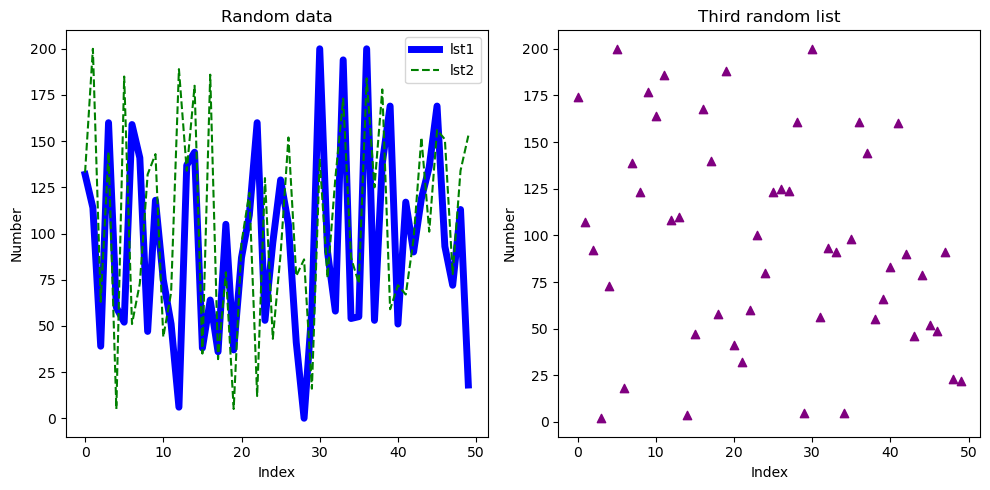

In [240]:
#2 -- Random Plotting practice
lst1 = np.random.randint(0, 201, 50) 
lst2 = np.random.randint(0, 201, 50)  
lst3 = np.random.randint(0, 201, 50) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#plot of first two lists
ax1.plot(lst1, color='blue', linewidth=5, label='lst1')
ax1.plot(lst2, color='green', linestyle='--', label='lst2')
ax1.set_title('Random data')
ax1.set_xlabel('Index')
ax1.set_ylabel('Number')
ax1.legend()

#plot of third list 
x = np.arange(len(lst3))
ax2.scatter(x, lst3, color='purple', marker='^')
ax2.set_title('Third random list')
ax2.set_xlabel('Index')
ax2.set_ylabel('Number')

plt.tight_layout()
plt.show()

In [242]:
# 3-- Monte Carlo
def estimate_pi(N):
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return 4 * inside_circle / N
    
N = [10, 10**3, 10**5, 10**6]
print(f"estimated pi  for N = 10: {estimate_pi(10)}")
print(f"estimated pi  for N = 10**3: {estimate_pi(10**3)}")
print(f"estimated pi  for N = 10**5: {estimate_pi(10**5)}")
print(f"estimated pi  for N = 10**6: {estimate_pi(10**6)}")

#What do you notice as N gets bigger?
    #As N gets bigger, the value of Pi gets closer to the actual value. 

estimated pi  for N = 10: 3.6
estimated pi  for N = 10**3: 3.096
estimated pi  for N = 10**5: 3.14612
estimated pi  for N = 10**6: 3.146744


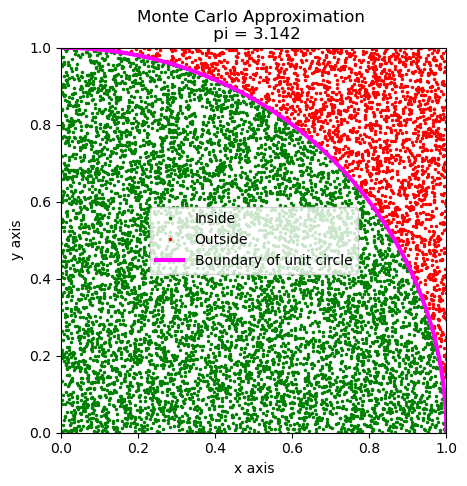

In [249]:
#For N = 10**4, plot the points within the quarter circle in one color and the points outside in another color.
N = 10**4

x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)

inside = x**2 + y**2 <= 1
outside = x**2 + y**2 > 1


plt.figure(figsize=(8, 5))
plt.plot(x[inside], y[inside], 'g.', markersize=3, label='Inside')  
plt.plot(x[outside], y[outside], 'r.', markersize=3, label='Outside')  

w = np.linspace(0, np.pi/2, 100)
x_coord = np.cos(w)
y_coord = np.sin(w)
plt.plot(x_coord, y_coord, 'magenta', linewidth=3, label='Boundary of unit circle')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title(f"Monte Carlo Approximation \n pi = {estimate_pi(N)}")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
